In [1]:
%pip install -r requirements.txt

Processing c:\b\abs_1c1a_vjay2\croot\aiobotocore_1682537737724\work (from -r requirements.txt (line 2))
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\b\\abs_1c1a_vjay2\\croot\\aiobotocore_1682537737724\\work'



In [2]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
# %pip install xgboost
# %pip install tensorflow
# %pip install keras
# %pip install torch
# %pip install optuna
# %pip install ipython
# %pip install imbalanced-learn
# %pip install cuda-python
# %pip install cupy-cuda12x

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, make_scorer
from sklearn.cluster import KMeans
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
import optuna
import joblib
import gc
import torch

c:\Users\JCPAG\Documents\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df = pd.read_csv('./caso_final_small_20k_con_mes.csv')

In [5]:
df.head()

,MES,MB_TOTALES,FACTURACION_TOTAL_IMPUESTOS,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA,MB_MENSUALES,EDAD,NUM_LLAMADAS_RED_PROPIA,...,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,NUM_DESACTIVACIONES,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,SERVICIOS_TOTALES_POSPAGO,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,TARGET
0,201901,232.121597,10.186000,0.000000,4523.0,1183.0,28.0,232.121597,39.0,54.0,...,21.683399,0,1.767800,0,100.0,2,1,0.0,0.264612,0
1,201911,18280.292969,32.005001,26.450001,13288.0,9194.0,49.0,18280.292969,25.0,152.0,...,166.050007,435,5.555000,0,100.0,1,2,0.0,0.380171,0
2,201906,2141.692810,37.442001,31.400000,13.0,13.0,0.0,2141.692810,47.0,4.0,...,108.850102,0,2.042002,0,100.0,2,2,0.0,0.156041,0
3,202006,3181.986496,20.001000,16.530000,0.0,0.0,0.0,3181.986496,43.0,0.0,...,65.799899,0,3.471001,0,100.0,2,3,0.0,0.228810,1
4,202001,25626.083984,37.005001,26.450001,72783.0,27609.0,151.0,25626.083984,40.0,329.0,...,519.683305,1,5.555000,0,100.0,1,1,0.0,0.210286,1


In [6]:
df.describe()

,MES,MB_TOTALES,FACTURACION_TOTAL_IMPUESTOS,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA,MB_MENSUALES,EDAD,NUM_LLAMADAS_RED_PROPIA,...,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,NUM_DESACTIVACIONES,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,SERVICIOS_TOTALES_POSPAGO,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,TARGET
count,20000.000000,19741.000000,19924.000000,19924.000000,19843.000000,19843.000000,19843.000000,19749.000000,19971.000000,19843.000000,...,19749.000000,20000.000000,19924.000000,20000.00000,19737.000000,20000.000000,20000.000000,19918.000000,18677.000000,20000.000000
mean,201948.470400,12307.320625,40.939452,25.179305,19282.843471,10334.947941,62.941239,12288.026161,43.990937,156.408456,...,361.817034,148.792200,5.657482,0.00785,99.975217,1.432750,1.792750,0.913010,0.257017,0.311050
std,49.255692,20115.499610,30.326117,13.067181,31773.406451,18971.928733,93.528782,20112.795794,14.125926,227.913588,...,543.391221,476.199046,3.552509,0.10435,1.284268,0.756972,1.329882,30.432569,0.073077,0.462935
min,201901.000000,0.000000,-0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,...,0.000000,0.000000,-1.190000,0.00000,0.000000,1.000000,0.000000,0.000000,0.039562,0.000000
25%,201905.000000,1929.673340,24.999000,15.700000,1777.000000,705.500000,11.000000,1915.529785,33.000000,29.000000,...,64.999998,0.000000,3.297000,0.00000,100.000000,1.000000,1.000000,0.000000,0.199451,0.000000
50%,201911.000000,5931.522949,33.004000,23.969999,8011.000000,3631.000000,36.000000,5898.413086,43.000000,87.000000,...,178.966798,1.000000,5.034000,0.00000,100.000000,1.000000,1.000000,0.000000,0.261877,0.000000
75%,202005.000000,16013.454310,50.124250,26.460000,23009.500000,11846.500000,82.000000,15967.201660,54.000000,199.000000,...,443.583287,2.000000,6.768002,0.00000,100.000000,2.000000,2.000000,0.000000,0.296955,1.000000
max,202011.000000,853613.593750,1246.438000,133.890000,584239.000000,422724.000000,6220.000000,853613.593750,98.000000,12497.000000,...,12316.250395,4056.000000,93.483509,4.00000,100.000000,8.000000,18.000000,2089.316758,0.380171,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   MES                                   20000 non-null  int64  
 1   MB_TOTALES                            19741 non-null  float64
 2   FACTURACION_TOTAL_IMPUESTOS           19924 non-null  float64
 3   FACTURACION_CUOTA                     19924 non-null  float64
 4   SEGUNDOS_LLAMADA_RED_PROPIA           19843 non-null  float64
 5   SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA  19843 non-null  float64
 6   SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA  19843 non-null  float64
 7   MB_MENSUALES                          19749 non-null  float64
 8   EDAD                                  19971 non-null  float64
 9   NUM_LLAMADAS_RED_PROPIA               19843 non-null  float64
 10  FACTURACION_TOTAL_SIN_IMPUESTOS       19924 non-null  float64
 11  NUM_LINEAS_PRIN

In [8]:
df.isnull().sum()

MES                                        0
MB_TOTALES                               259
FACTURACION_TOTAL_IMPUESTOS               76
FACTURACION_CUOTA                         76
SEGUNDOS_LLAMADA_RED_PROPIA              157
SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA     157
SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA     157
MB_MENSUALES                             251
EDAD                                      29
NUM_LLAMADAS_RED_PROPIA                  157
FACTURACION_TOTAL_SIN_IMPUESTOS           76
NUM_LINEAS_PRIN_POSPAGO                    0
NUM_LINEAS_POSPAGO                         0
NUM_LINEAS_FIJAS                           0
NUM_DIAS_CONVERGENTE                       0
NUM_LINEAS_FIJAS_POSPAGO                   0
NUM_SERVICIOS_POSPAGO                      0
DIAS_PRIMERA_CUENTA                        0
NUM_CANCELACIONES                          0
LLAMADAS_MOVILES                          82
NUM_LINEAS_POSPAGO_TOTAL                   0
TERMINO_FACTURACION                       76
NUM_DESACT

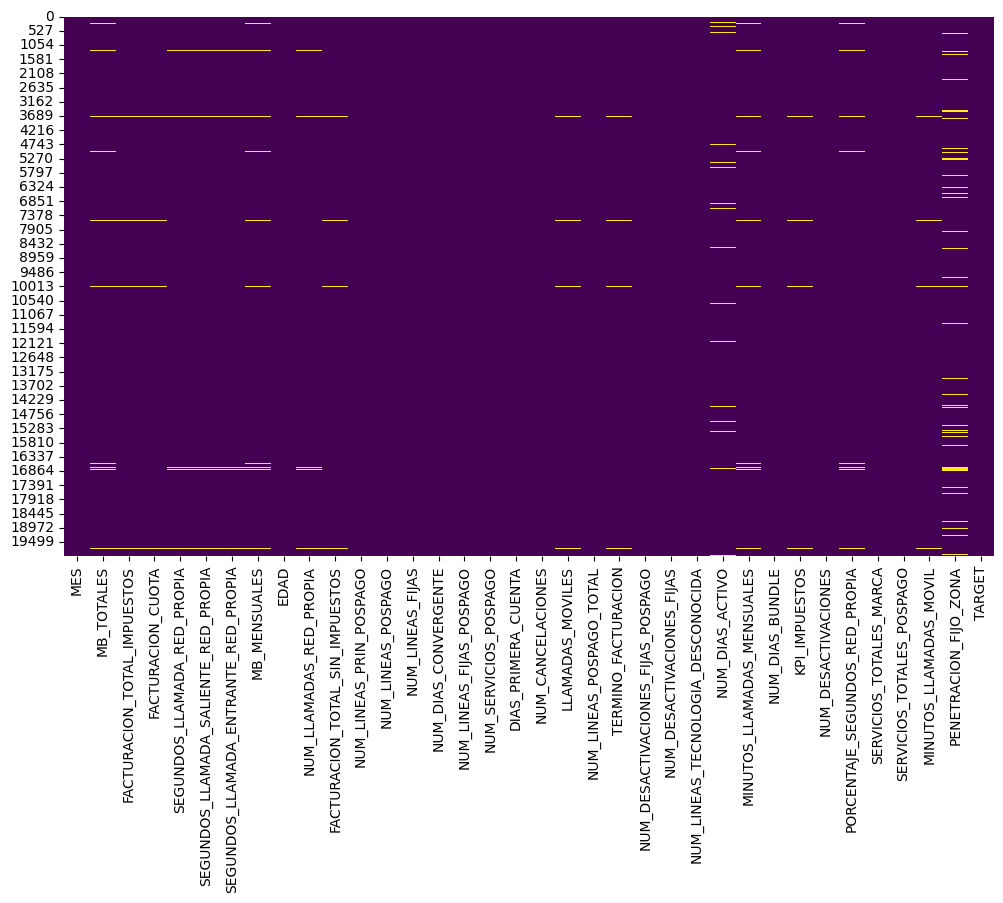

In [9]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [10]:
imputer = IterativeImputer(max_iter=10000, random_state=42)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [11]:
def detect_outliers(df):
    outliers = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers[column] = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].shape[0]
    return outliers

outliers = detect_outliers(df_imputed)
outliers

{'MES': 0,
 'MB_TOTALES': 1326,
 'FACTURACION_TOTAL_IMPUESTOS': 1042,
 'FACTURACION_CUOTA': 1791,
 'SEGUNDOS_LLAMADA_RED_PROPIA': 1824,
 'SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA': 1916,
 'SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA': 1397,
 'MB_MENSUALES': 1327,
 'EDAD': 40,
 'NUM_LLAMADAS_RED_PROPIA': 1443,
 'FACTURACION_TOTAL_SIN_IMPUESTOS': 1019,
 'NUM_LINEAS_PRIN_POSPAGO': 2675,
 'NUM_LINEAS_POSPAGO': 423,
 'NUM_LINEAS_FIJAS': 21,
 'NUM_DIAS_CONVERGENTE': 654,
 'NUM_LINEAS_FIJAS_POSPAGO': 21,
 'NUM_SERVICIOS_POSPAGO': 423,
 'DIAS_PRIMERA_CUENTA': 101,
 'NUM_CANCELACIONES': 1475,
 'LLAMADAS_MOVILES': 124,
 'NUM_LINEAS_POSPAGO_TOTAL': 1966,
 'TERMINO_FACTURACION': 2446,
 'NUM_DESACTIVACIONES_FIJAS_POSPAGO': 47,
 'NUM_DESACTIVACIONES_FIJAS': 47,
 'NUM_LINEAS_TECNOLOGIA_DESCONOCIDA': 423,
 'NUM_DIAS_ACTIVO': 134,
 'MINUTOS_LLAMADAS_MENSUALES': 1621,
 'NUM_DIAS_BUNDLE': 3133,
 'KPI_IMPUESTOS': 988,
 'NUM_DESACTIVACIONES': 132,
 'PORCENTAJE_SEGUNDOS_RED_PROPIA': 293,
 'SERVICIOS_TOTALES_MARCA': 54

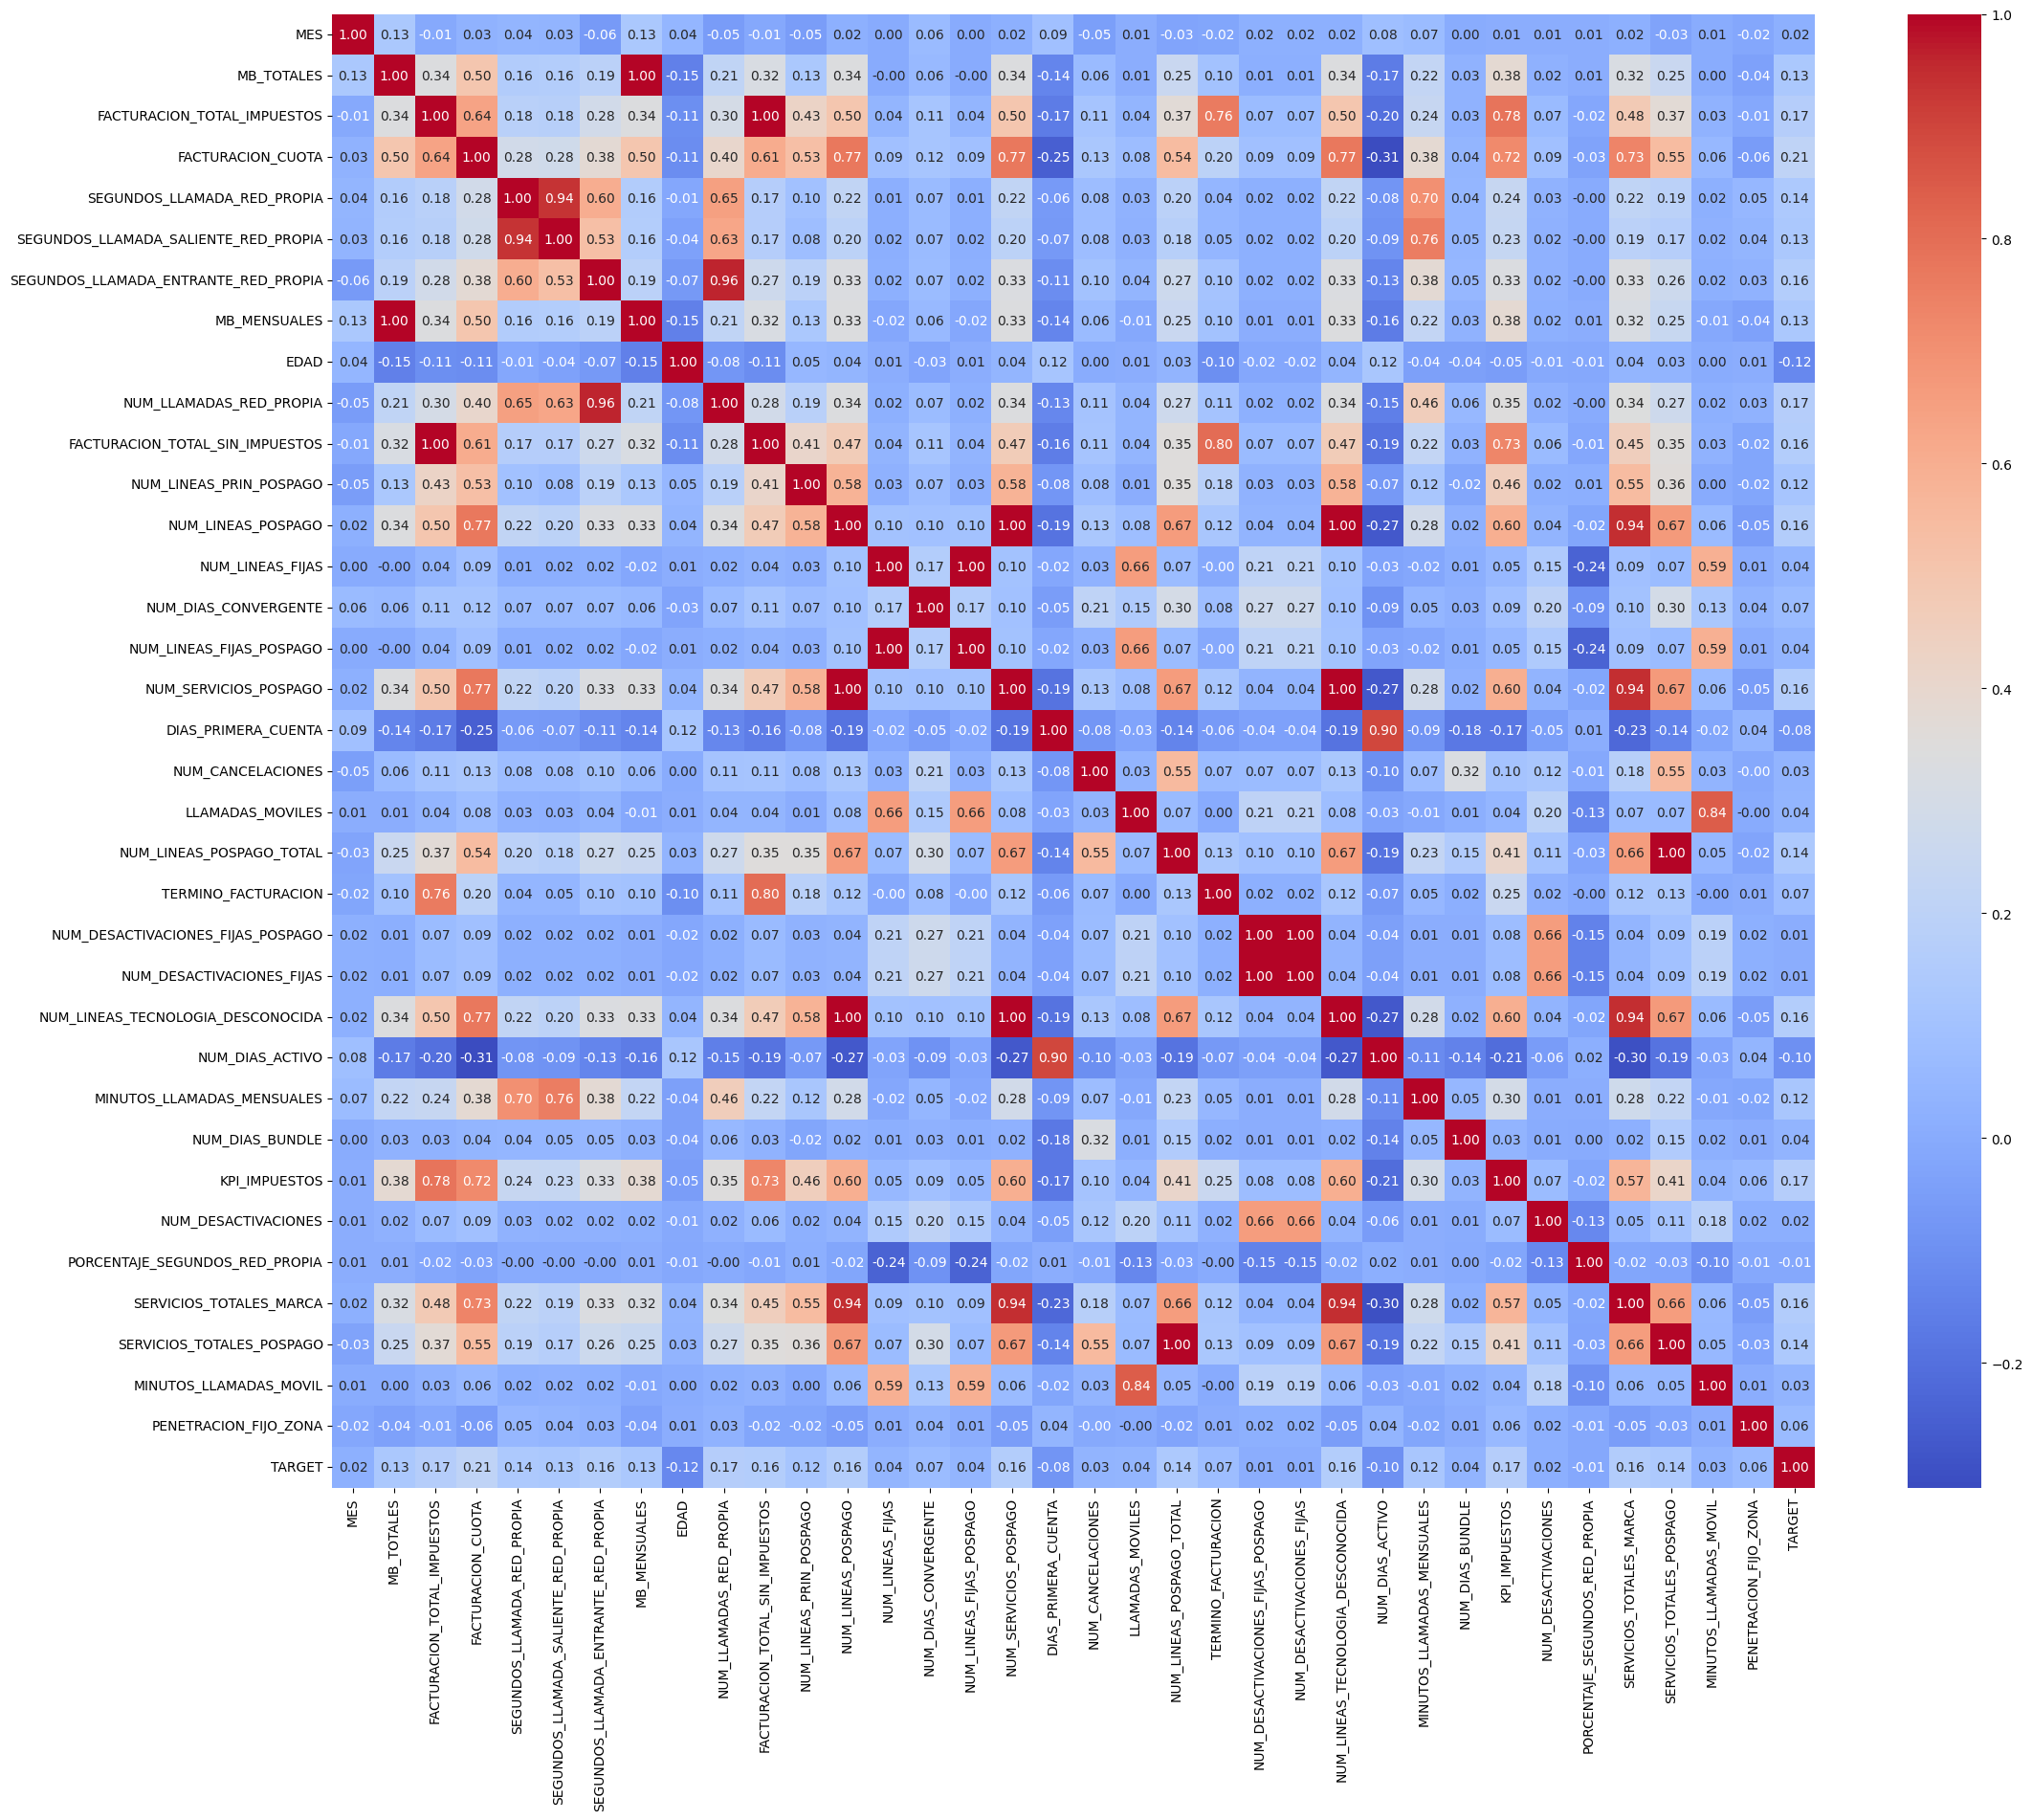

In [12]:
# Matriz de correlación
corr_matrix = df_imputed.corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [13]:
corr_threshold = 0.85

# Calcular la matriz de correlación
corr_matrix = df_imputed.corr()

# Creamos una lista vacía para almacenar las columnas a eliminar
columns_to_drop = []

# Recorremos la matriz de correlación
for i in range(len(corr_matrix.columns)):
  for j in range(i + 1, len(corr_matrix.columns)):
    # Si la correlación entre dos columnas supera el umbral y no son la misma columna, agregamos la columna con el índice mayor a la lista de columnas a eliminar
    if corr_matrix.iloc[i, j] > corr_threshold and i != j:
      columns_to_drop.append(corr_matrix.columns[j])

# Eliminamos las columnas seleccionadas del DataFrame
df_reduced = df_imputed.drop(columns=columns_to_drop)

# Imprimimos las primeras filas del DataFrame reducido
df_reduced.head()

,MES,MB_TOTALES,FACTURACION_TOTAL_IMPUESTOS,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA,EDAD,NUM_LINEAS_PRIN_POSPAGO,NUM_LINEAS_POSPAGO,NUM_LINEAS_FIJAS,...,TERMINO_FACTURACION,NUM_DESACTIVACIONES_FIJAS_POSPAGO,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,NUM_DESACTIVACIONES,PORCENTAJE_SEGUNDOS_RED_PROPIA,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,TARGET
0,201901.0,232.121597,10.186000,0.000000,4523.0,28.0,39.0,1.0,1.0,0.0,...,0.0,0.0,21.683399,0.0,1.767800,0.0,100.0,0.0,0.264612,0.0
1,201911.0,18280.292969,32.005001,26.450001,13288.0,49.0,25.0,1.0,1.0,0.0,...,0.0,0.0,166.050007,435.0,5.555000,0.0,100.0,0.0,0.380171,0.0
2,201906.0,2141.692810,37.442001,31.400000,13.0,0.0,47.0,2.0,2.0,0.0,...,4.0,0.0,108.850102,0.0,2.042002,0.0,100.0,0.0,0.156041,0.0
3,202006.0,3181.986496,20.001000,16.530000,0.0,0.0,43.0,1.0,2.0,0.0,...,0.0,0.0,65.799899,0.0,3.471001,0.0,100.0,0.0,0.228810,1.0
4,202001.0,25626.083984,37.005001,26.450001,72783.0,151.0,40.0,1.0,1.0,0.0,...,5.0,0.0,519.683305,1.0,5.555000,0.0,100.0,0.0,0.210286,1.0


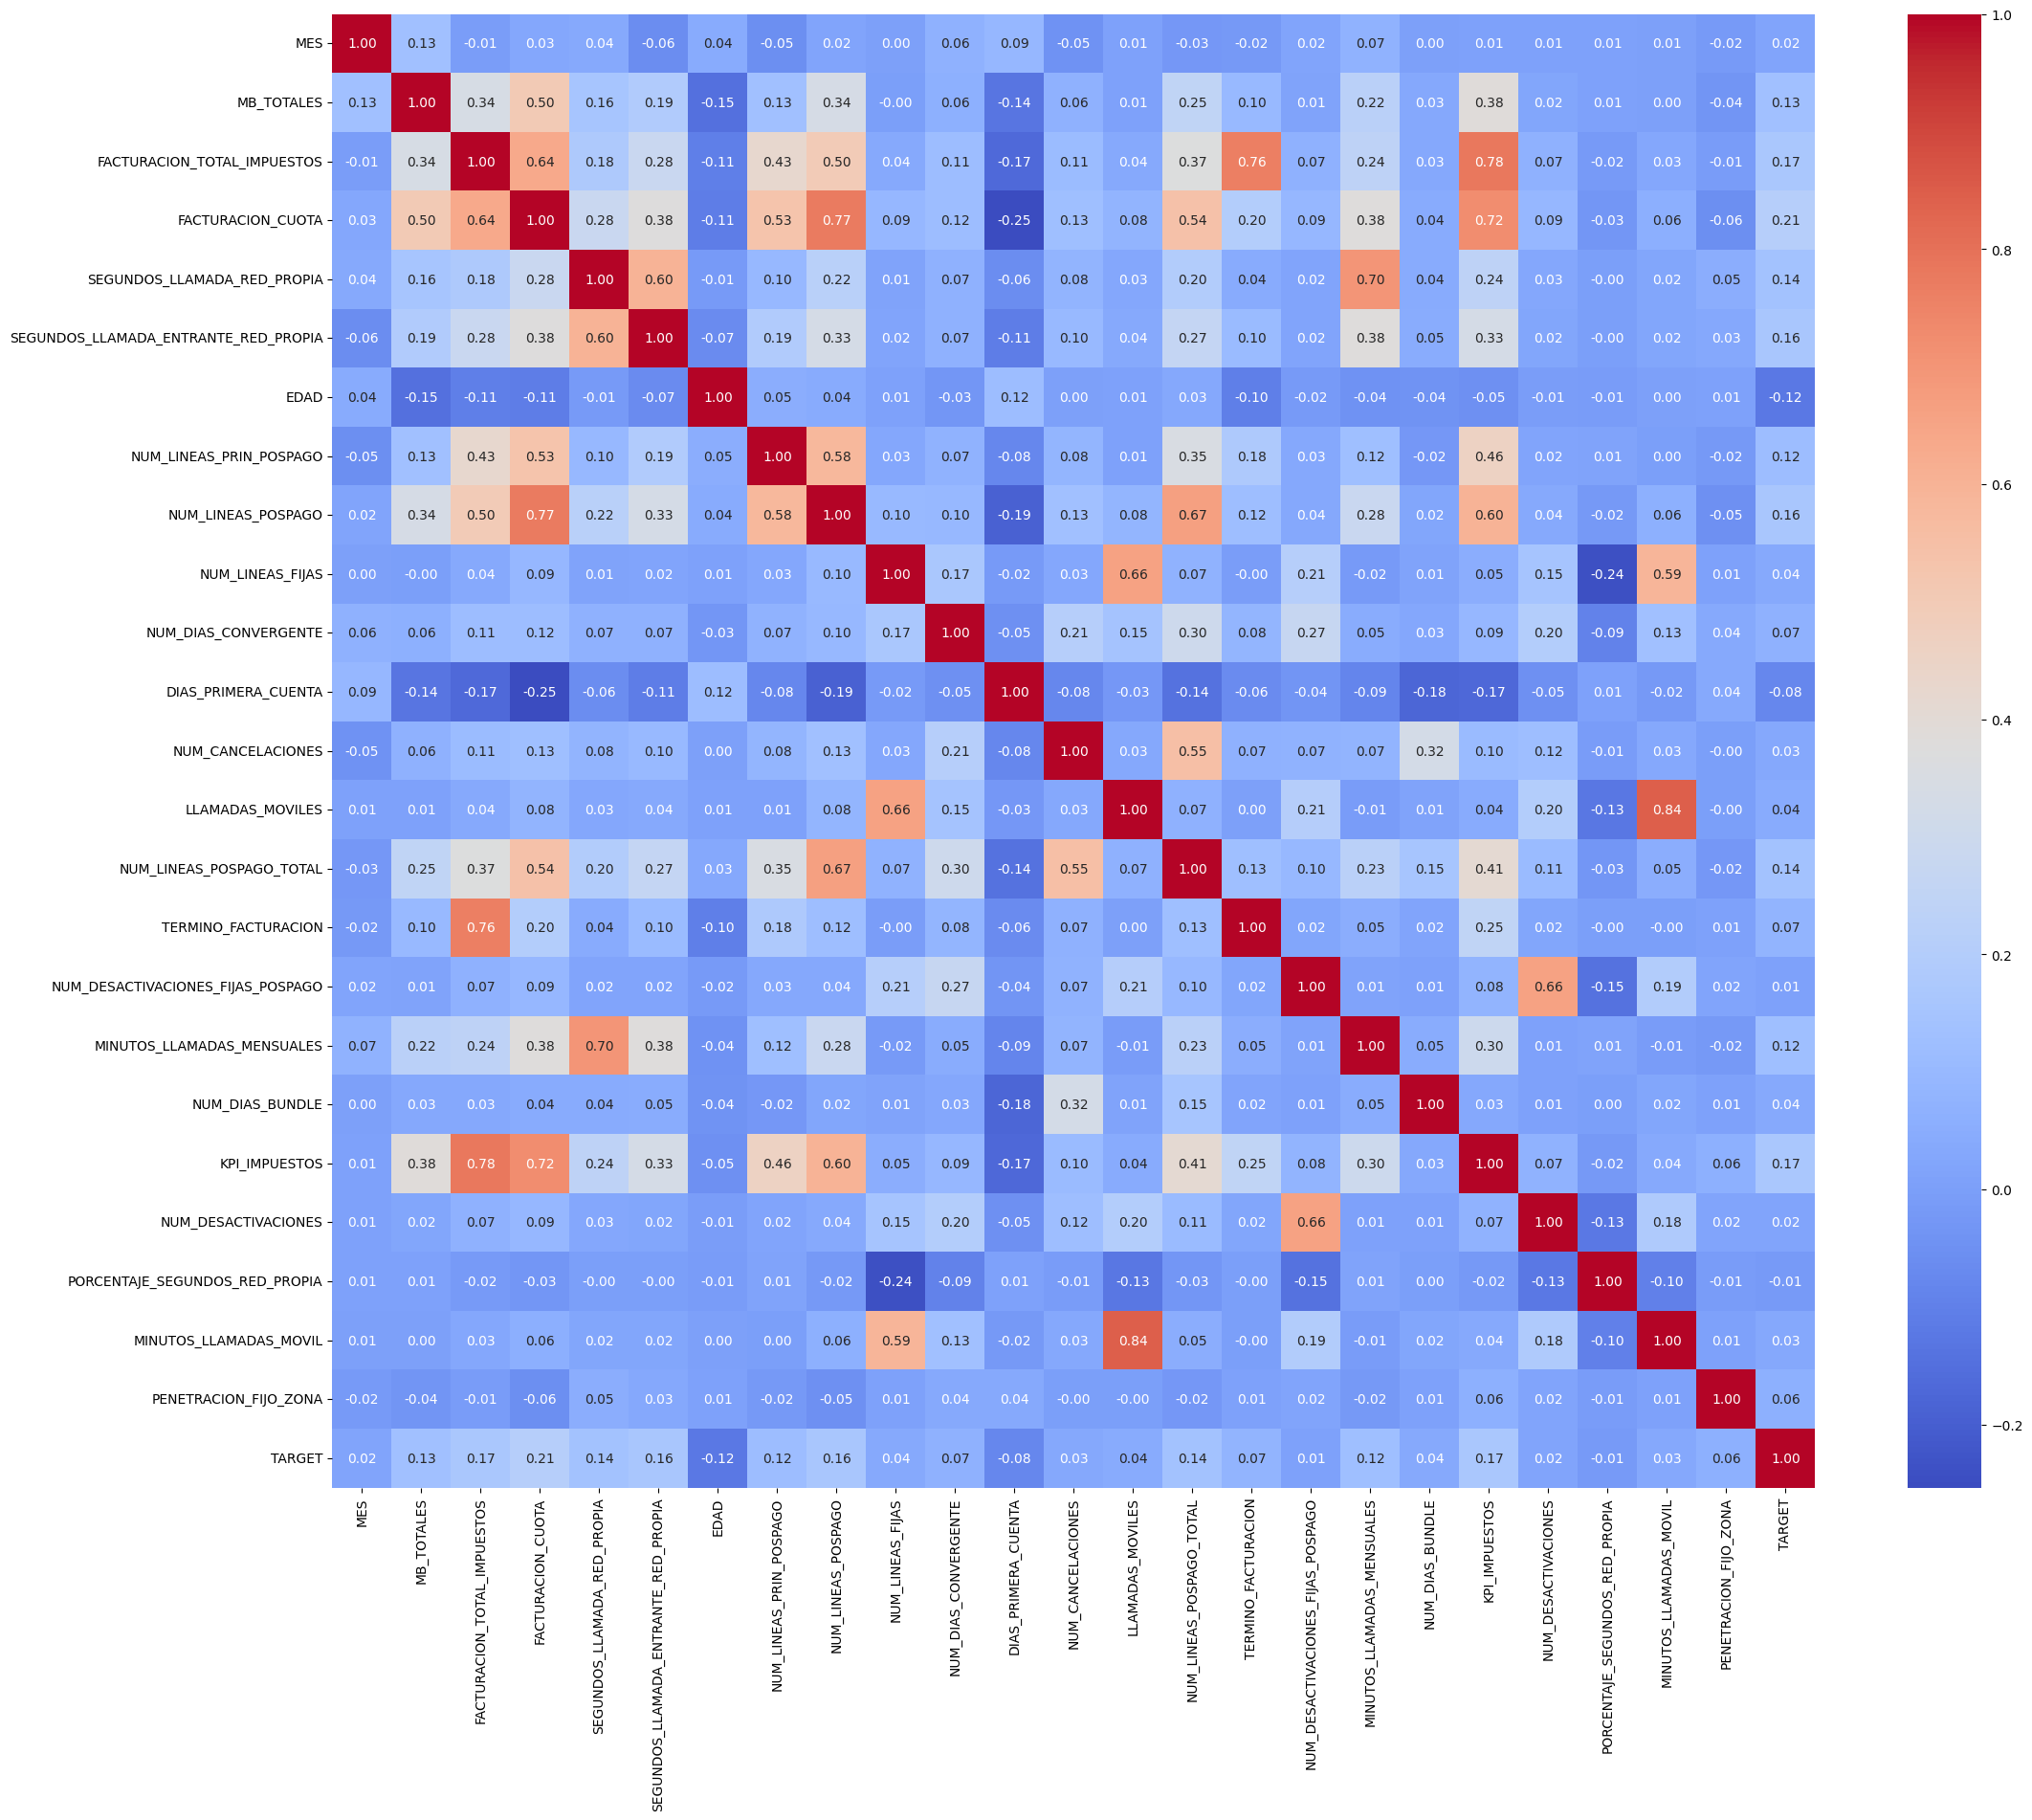

In [14]:
# Matriz de correlación
corr_matrix = df_reduced.corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [15]:
df_reduced.shape, df_imputed.shape

((20000, 25), (20000, 36))

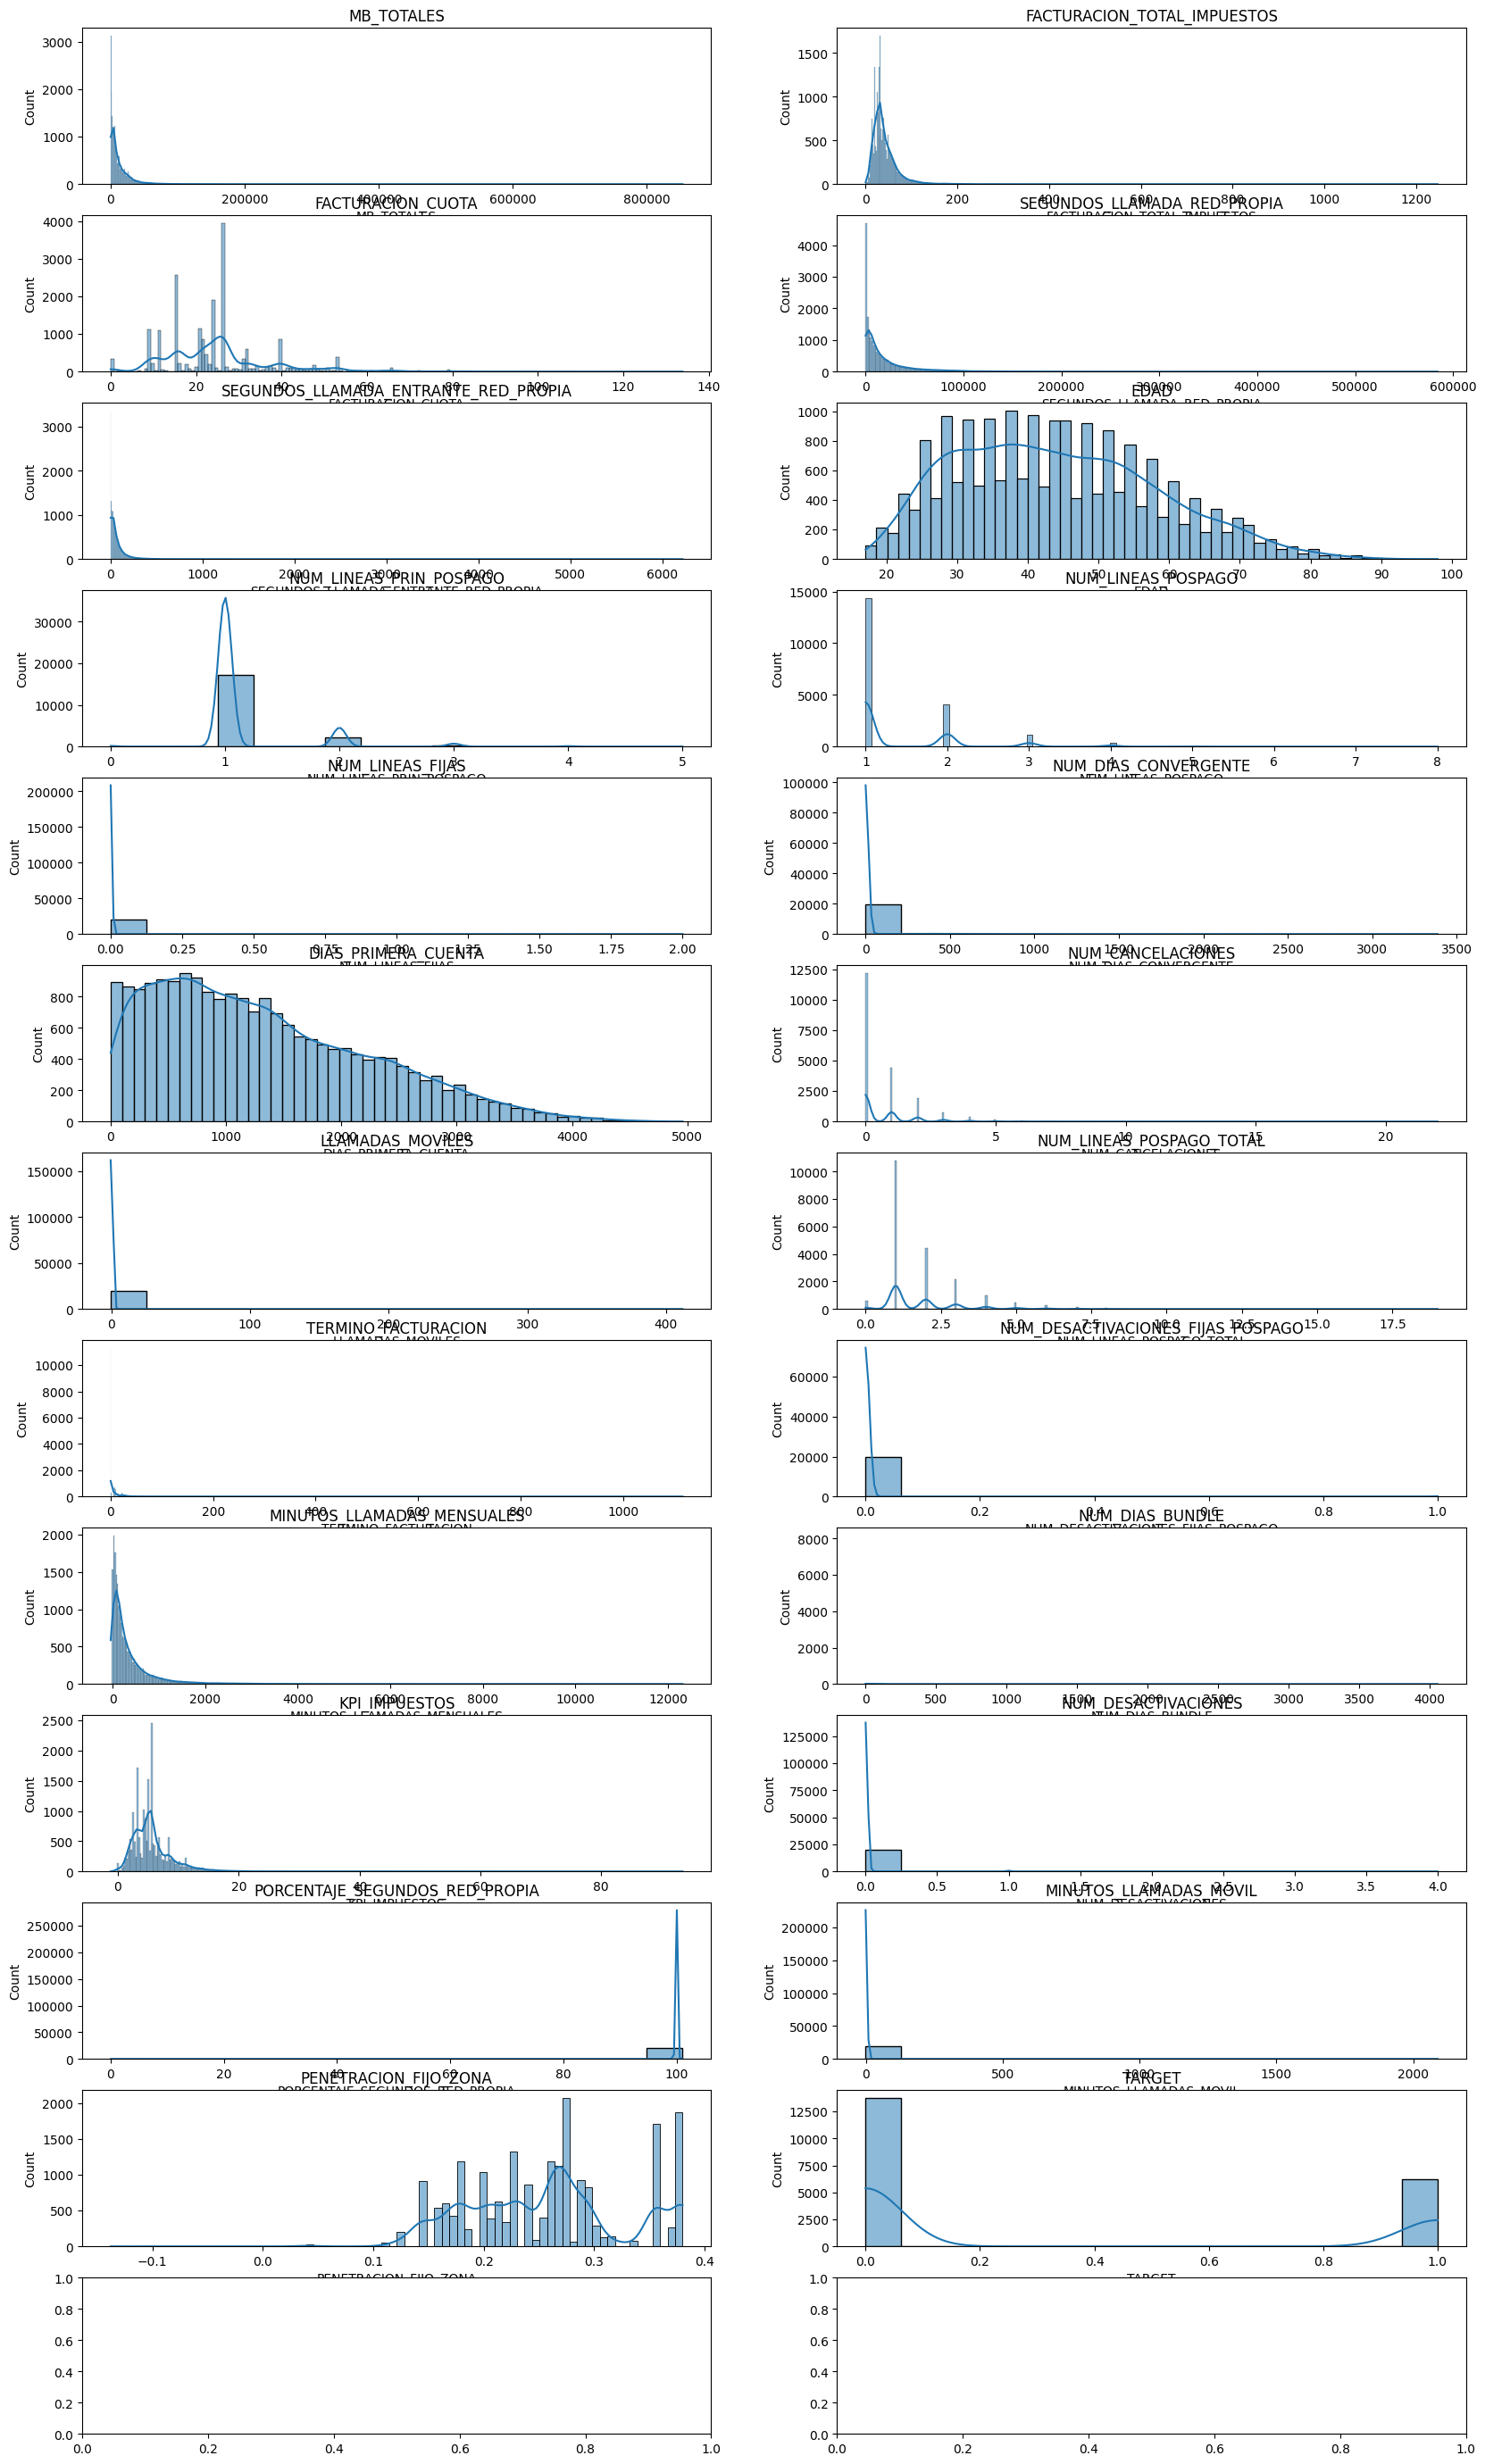

In [16]:
# Histograma de algunas variables
variables = df_reduced.columns[1:]
ax, fig = plt.subplots(figsize=(20, 35), nrows=13, ncols=2)
fig = fig.flatten()
for i, var in enumerate(variables):
    sns.histplot(df_reduced[var], ax=fig[i], kde=True)
    fig[i].set_title(var)
plt.show()


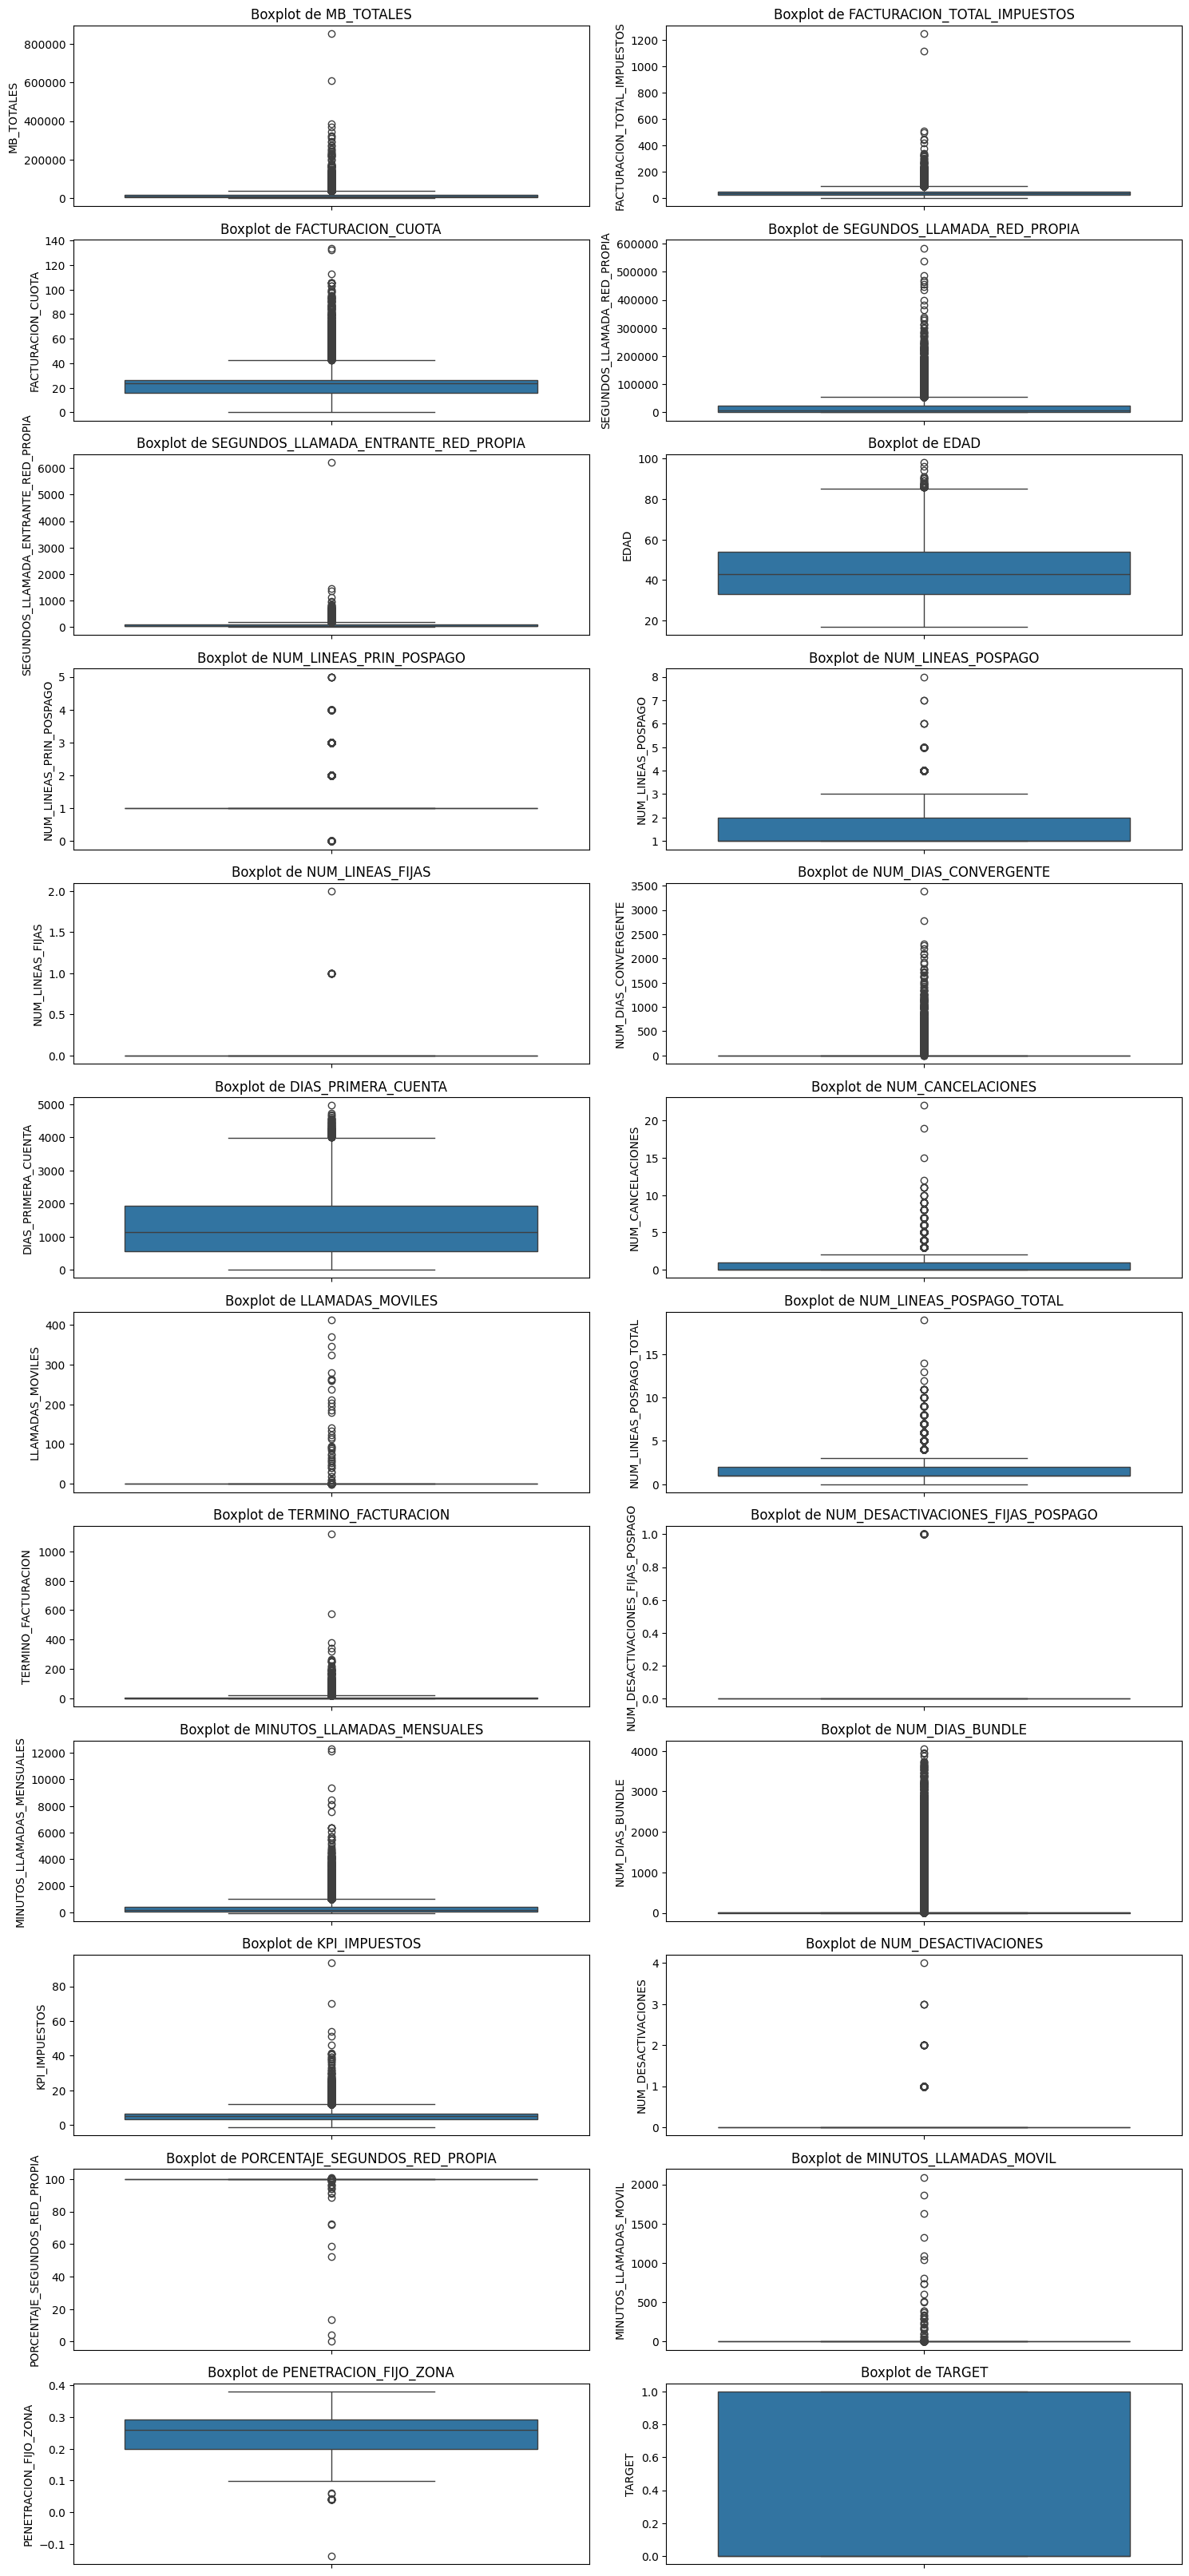

In [17]:
# Boxplot de algunas variables
plt.figure(figsize=(15, 35))
for i, column in enumerate(variables, 1):
    plt.subplot(13, 2, i)
    sns.boxplot(y=df_imputed[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

In [18]:
# Convertir la columna MES al formato de fecha
df_reduced['MES'] = pd.to_datetime(df_reduced['MES'], format='%Y%m')

# Crear nuevas columnas para año y mes
df_reduced['MES_AÑO'] = df_reduced['MES'].dt.year
df_reduced['MES_MES'] = df_reduced['MES'].dt.month

# Eliminar la columna original MES si no se va a usar directamente
df_reduced = df_reduced.drop('MES', axis=1)

C:\Users\JCPAG\AppData\Local\Temp\ipykernel_22520\1746465516.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x='MES_AÑO', data=df_reduced[df_reduced['TARGET'] == 0], palette='viridis')
C:\Users\JCPAG\AppData\Local\Temp\ipykernel_22520\1746465516.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], x='MES_AÑO', data=df_reduced[df_reduced['TARGET'] == 1], palette='magma')


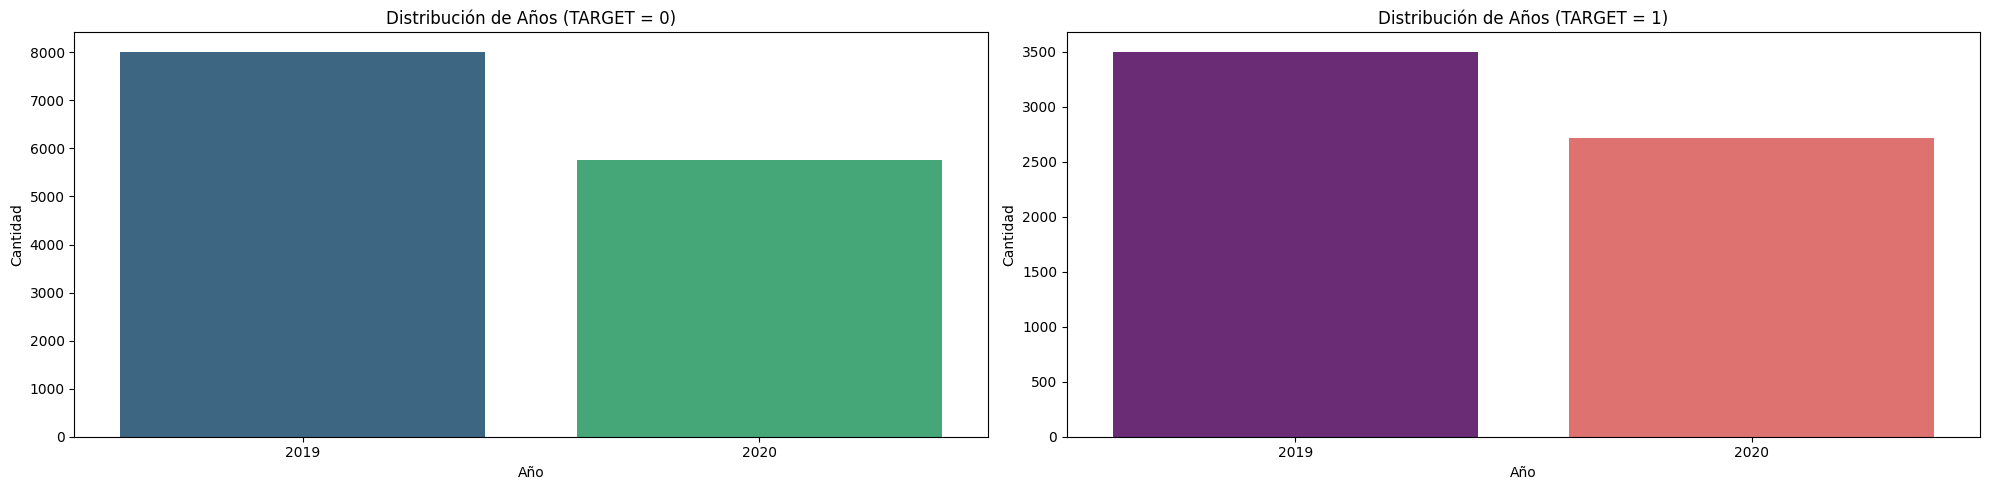

C:\Users\JCPAG\AppData\Local\Temp\ipykernel_22520\1746465516.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x='MES_MES', data=df_reduced[df_reduced['TARGET'] == 0], palette='viridis')
C:\Users\JCPAG\AppData\Local\Temp\ipykernel_22520\1746465516.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], x='MES_MES', data=df_reduced[df_reduced['TARGET'] == 1], palette='magma')


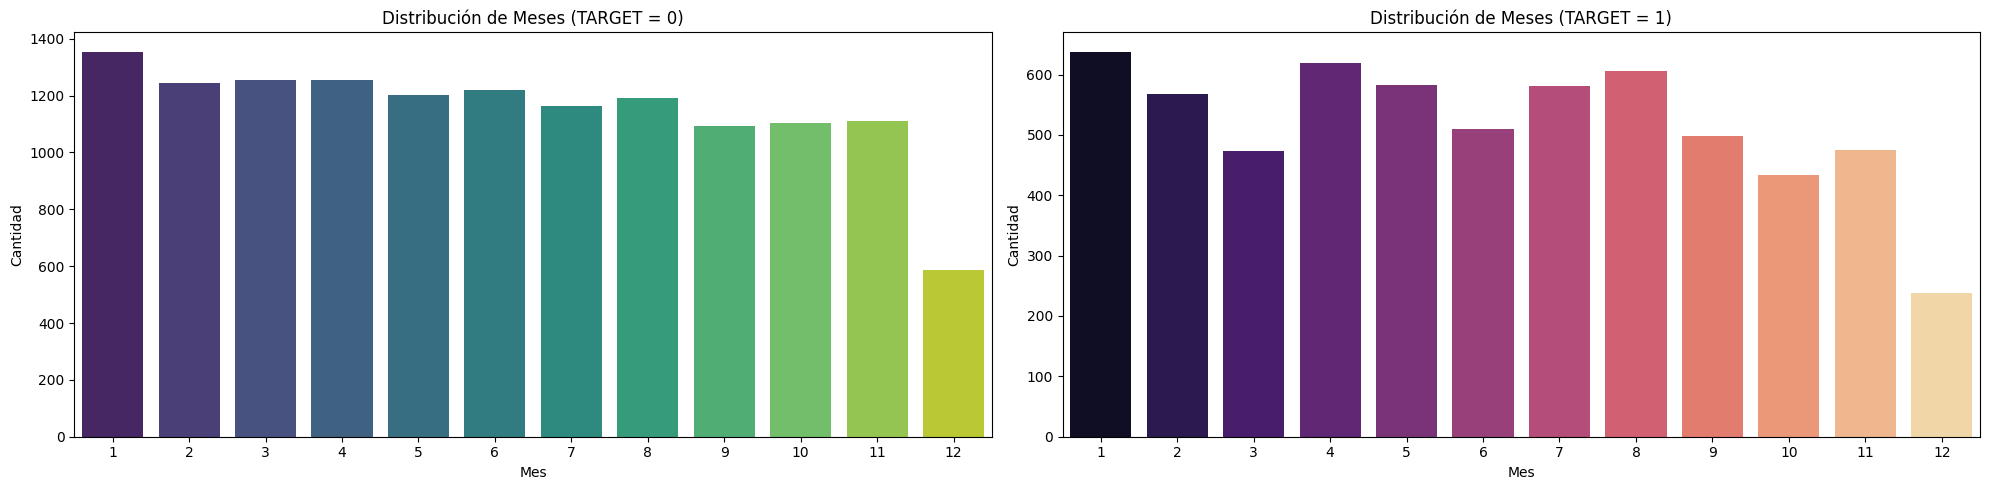

In [19]:
# Crear las figuras y los subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Distribución de años con TARGET 0
sns.countplot(ax=axes[0], x='MES_AÑO', data=df_reduced[df_reduced['TARGET'] == 0], palette='viridis')
axes[0].set_title('Distribución de Años (TARGET = 0)')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Cantidad')

# Distribución de años con TARGET 1
sns.countplot(ax=axes[1], x='MES_AÑO', data=df_reduced[df_reduced['TARGET'] == 1], palette='magma')
axes[1].set_title('Distribución de Años (TARGET = 1)')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()

# Crear las figuras y los subplots para la distribución de meses
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Distribución de meses con TARGET 0
sns.countplot(ax=axes[0], x='MES_MES', data=df_reduced[df_reduced['TARGET'] == 0], palette='viridis')
axes[0].set_title('Distribución de Meses (TARGET = 0)')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Cantidad')

# Distribución de meses con TARGET 1
sns.countplot(ax=axes[1], x='MES_MES', data=df_reduced[df_reduced['TARGET'] == 1], palette='magma')
axes[1].set_title('Distribución de Meses (TARGET = 1)')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()

In [20]:
from sklearn.neighbors import LocalOutlierFactor

# Asumiendo que 'X' es tu DataFrame de características
# Inicializar el detector LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # Puedes ajustar los parámetros según tus necesidades

# Ajustar el modelo y predecir los outliers
yhat = lof.fit_predict(df_reduced)

# Seleccionar todos los puntos que no son outliers
mask = yhat != -1
df_cleaned = df_reduced[mask]

# Mostrar la cantidad de outliers detectados y eliminados
print(f"Outliers detectados y eliminados: {np.sum(yhat == -1)}")
print(f"Datos restantes después de la limpieza: {df_cleaned.shape[0]}")

# X_cleaned ahora contiene el DataFrame sin los outliers

Outliers detectados y eliminados: 1000
Datos restantes después de la limpieza: 19000


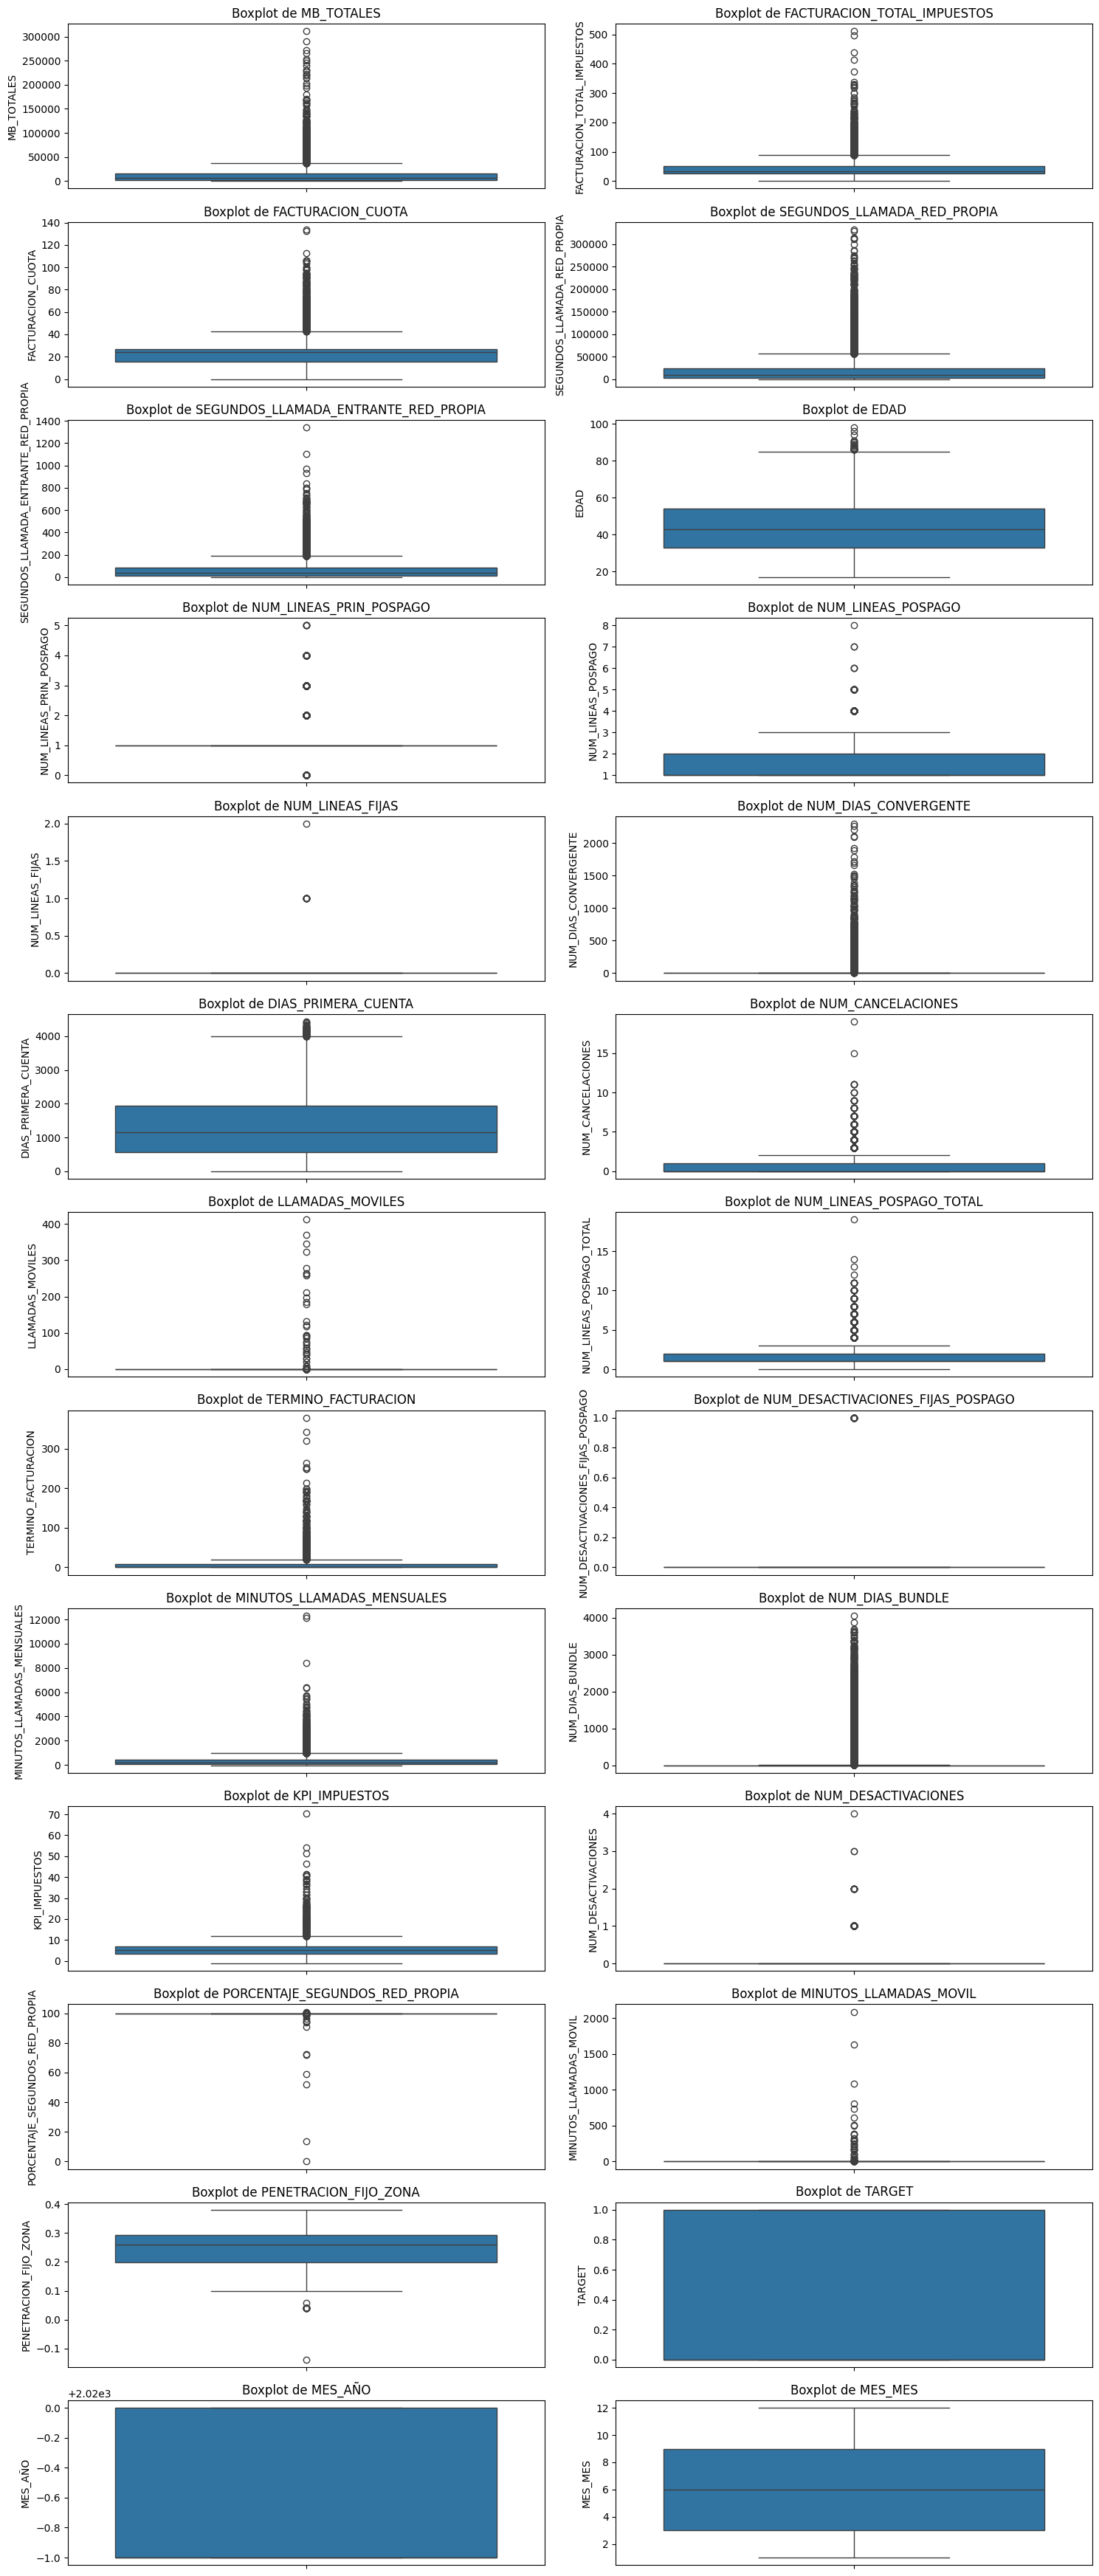

In [21]:
# Boxplot de algunas variables
plt.figure(figsize=(15, 35))
for i, column in enumerate(df_cleaned.columns, 1):
    plt.subplot(13, 2, i)
    sns.boxplot(y=df_cleaned[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

In [24]:
df_cleaned.to_csv('./caso_final_small_20k_con_mes_cleaned.csv', index=False)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, fbeta_score, roc_auc_score, make_scorer, roc_curve, auc, f1_score
from sklearn.cluster import KMeans
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
import optuna
import joblib
import gc
import torch
import logging

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df_cleaned = pd.read_csv('./caso_final_small_20k_con_mes_cleaned.csv')

In [5]:
X = df_cleaned.drop('TARGET', axis=1)
y = df_cleaned['TARGET']

In [6]:
# Asumiendo que 'X_cleaned' es tu DataFrame limpio sin outliers
columns_to_scale = [
    'MB_TOTALES', 'FACTURACION_TOTAL_IMPUESTOS', 'FACTURACION_CUOTA',
    'SEGUNDOS_LLAMADA_RED_PROPIA', 'SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA',
    'EDAD', 'NUM_LINEAS_PRIN_POSPAGO', 'NUM_LINEAS_POSPAGO',
    'NUM_LINEAS_FIJAS', 'NUM_DIAS_CONVERGENTE', 'DIAS_PRIMERA_CUENTA',
    'NUM_CANCELACIONES', 'LLAMADAS_MOVILES', 'NUM_LINEAS_POSPAGO_TOTAL',
    'TERMINO_FACTURACION', 'NUM_DESACTIVACIONES_FIJAS_POSPAGO',
    'MINUTOS_LLAMADAS_MENSUALES', 'NUM_DIAS_BUNDLE', 'KPI_IMPUESTOS',
    'NUM_DESACTIVACIONES', 'PORCENTAJE_SEGUNDOS_RED_PROPIA',
    'MINUTOS_LLAMADAS_MOVIL', 'PENETRACION_FIJO_ZONA'
]

# Escalar las columnas especificadas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[columns_to_scale])

# Transformar las columnas MES_MES y MES_AÑO
mes_sin = np.sin(2 * np.pi * X['MES_MES'] / 12).values.reshape(-1, 1)
mes_cos = np.cos(2 * np.pi * X['MES_MES'] / 12).values.reshape(-1, 1)
mes_ano =  pd.get_dummies(X['MES_AÑO'], prefix='AÑO')
mes_ano = mes_ano.values.reshape(-1, mes_ano.shape[1])

# Concatenar las columnas transformadas al array escalado
X_scaled = np.concatenate([X_scaled, mes_sin, mes_cos, mes_ano], axis=1)

# Verificar la forma final del array
X_scaled.shape, mes_ano


((19000, 27),
 array([[ True, False],
        [ True, False],
        [ True, False],
        ...,
        [False,  True],
        [False,  True],
        [False,  True]]))

In [7]:
X_scaled

array([[-6.84182184e-01, -1.10149513e+00, -1.93868604e+00, ...,
         8.66025404e-01,  1.00000000e+00,  0.00000000e+00],
       [ 3.40596267e-01, -3.17975380e-01,  9.58157308e-02, ...,
         8.66025404e-01,  1.00000000e+00,  0.00000000e+00],
       [-5.75756383e-01, -1.22732846e-01,  4.76563600e-01, ...,
        -1.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       ...,
       [-5.43044202e-01, -1.53220464e-01, -9.49429530e-02, ...,
         5.00000000e-01,  0.00000000e+00,  1.00000000e+00],
       [ 2.24202551e-01, -3.17975380e-01,  9.58157308e-02, ...,
        -8.66025404e-01,  0.00000000e+00,  1.00000000e+00],
       [-4.06366468e-01, -7.47710076e-01, -7.31061218e-01, ...,
         6.12323400e-17,  0.00000000e+00,  1.00000000e+00]])

In [8]:
X_df_scaled = pd.DataFrame(X_scaled, columns=columns_to_scale + ['MES_MES_SIN', 'MES_MES_COS', '2019', '2020'])

In [9]:
X_df_scaled.head()

,MB_TOTALES,FACTURACION_TOTAL_IMPUESTOS,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA,EDAD,NUM_LINEAS_PRIN_POSPAGO,NUM_LINEAS_POSPAGO,NUM_LINEAS_FIJAS,NUM_DIAS_CONVERGENTE,...,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,NUM_DESACTIVACIONES,PORCENTAJE_SEGUNDOS_RED_PROPIA,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,MES_MES_SIN,MES_MES_COS,2019,2020
0,-0.684182,-1.101495,-1.938686,-0.500447,-0.436911,-0.345230,-0.345214,-0.543741,-0.028305,-0.135434,...,-0.281058,-1.117634,-0.074403,0.01742,-0.027733,0.105318,5.000000e-01,0.866025,1.0,0.0
1,0.340596,-0.317975,0.095816,-0.206424,-0.180951,-1.336961,-0.345214,-0.543741,-0.028305,-0.135434,...,0.806067,-0.030790,-0.074403,0.01742,-0.027733,1.733521,-5.000000e-01,0.866025,1.0,0.0
2,-0.575756,-0.122733,0.476564,-0.651736,-0.778192,0.221473,1.952989,0.873222,-0.028305,-0.135434,...,-0.281058,-1.038944,-0.074403,0.01742,-0.027733,-1.424426,1.224647e-16,-1.000000,1.0,0.0
3,-0.516688,-0.749039,-0.667219,-0.652172,-0.778192,-0.061879,-0.345214,0.873222,-0.028305,-0.135434,...,-0.281058,-0.628853,-0.074403,0.01742,-0.027733,-0.399127,1.224647e-16,-1.000000,0.0,1.0
4,0.757692,-0.138426,0.095816,1.789344,1.062286,-0.274392,-0.345214,-0.543741,-0.028305,-0.135434,...,-0.278559,-0.030790,-0.074403,0.01742,-0.027733,-0.660132,5.000000e-01,0.866025,0.0,1.0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [12]:
pruner = optuna.pruners.MedianPruner(n_startup_trials=0, n_warmup_steps=30, interval_steps=10)

In [11]:
def optimize_lr(trial):
    try:
        C = trial.suggest_float('C', 1e-10, 1e10, log=True)
        penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet'])
        solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
        lr = LogisticRegression(C=C, penalty=penalty, solver=solver, random_state=42, max_iter=10000)
        scorer = make_scorer(roc_auc_score)
        lr_score = cross_val_score(lr, X_train, y_train, cv=5, scoring=scorer).mean()
        del lr
        del scorer
        gc.collect()
        return lr_score
    except:
        return float('-inf')

In [34]:
# Cargar el estudio desde la base de datos SQLite
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_lr.db', load_if_exists=True, study_name='Logistic Regression', pruner=pruner)

# Continuar la optimización
study.optimize(optimize_lr, n_trials=100)

# Guardar el mejor modelo encontrado
best_lr = study.best_params

# Serializar el estudio para guardarlo
joblib.dump(study, 'optuna_study_lr.pkl')

# Imprimir los mejores parámetros
best_lr

[I 2024-06-04 01:23:57,750] A new study created in RDB with name: Logistic Regression AUC
[I 2024-06-04 01:23:57,896] Trial 0 finished with value: -inf and parameters: {'C': 1.0003064012950733, 'penalty': 'elasticnet', 'solver': 'newton-cg'}. Best is trial 0 with value: -inf.
[I 2024-06-04 01:24:05,510] Trial 1 finished with value: 0.5483759663503477 and parameters: {'C': 113757.72928314332, 'penalty': 'l2', 'solver': 'saga'}. Best is trial 1 with value: 0.5483759663503477.
[I 2024-06-04 01:24:13,329] Trial 2 finished with value: 0.5483759663503477 and parameters: {'C': 4954304.9202199215, 'penalty': 'l2', 'solver': 'saga'}. Best is trial 1 with value: 0.5483759663503477.
[I 2024-06-04 01:24:14,013] Trial 3 finished with value: 0.5483281880416999 and parameters: {'C': 1095.483135877983, 'penalty': 'l2', 'solver': 'newton-cg'}. Best is trial 1 with value: 0.5483759663503477.
[I 2024-06-04 01:24:14,209] Trial 4 finished with value: -inf and parameters: {'C': 23.91048748138089, 'penalty':

{'C': 113757.72928314332, 'penalty': 'l2', 'solver': 'saga'}

{'C': 6.831921663804194, 'penalty': 'l2', 'solver': 'newton-cholesky'}

In [35]:
study.best_value

0.5483759663503477

In [36]:
lr = LogisticRegression(**best_lr, random_state=42, max_iter=10000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.95      0.81      2616
         1.0       0.56      0.15      0.23      1184

    accuracy                           0.70      3800
   macro avg       0.64      0.55      0.52      3800
weighted avg       0.66      0.70      0.63      3800



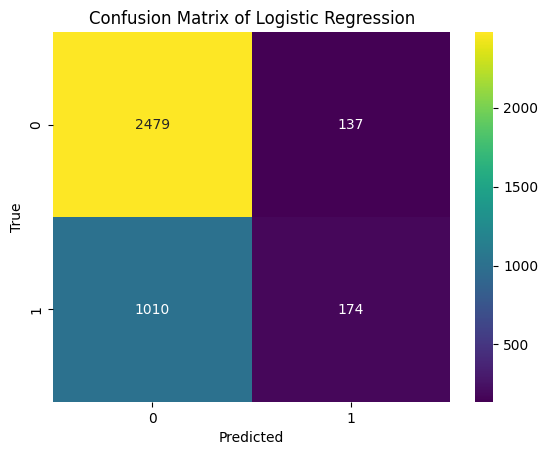

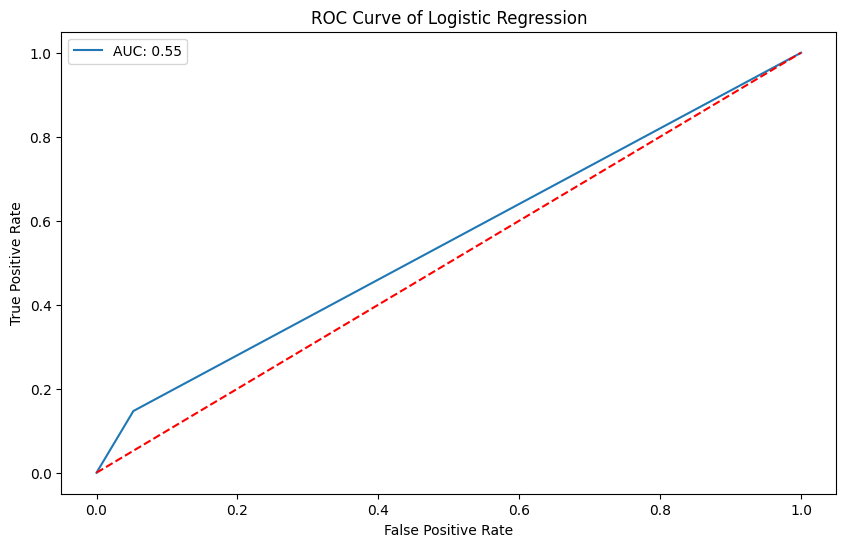

In [37]:
# roc auc curve painted of logistic regression
roc_auc_lr = roc_auc_score(y_test, y_pred)

# Confusion matrix of logistic regression
cm_lr = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_lr, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

# roc auc curve painted of logistic regression
roc_auc_lr

# plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_lr:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Logistic Regression')
plt.legend()
plt.show()

In [11]:
def optimize_random_forest(trial):
    try:
        n_estimators = trial.suggest_int('n_estimators', 100, 5000)
        max_depth = trial.suggest_int('max_depth', 10, 100)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 100)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 100)
        criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
        max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
        
        class_weight_option = trial.suggest_int('class_weight', 0, 3)
        
        # Asignar pesos según el valor entero seleccionado
        if class_weight_option == 0:
            class_weight = None
        elif class_weight_option == 1:
            class_weight = 'balanced'
        elif class_weight_option == 2:
            class_weight = {0: 1, 1: 2}
        elif class_weight_option == 3:
            class_weight = {0: 1, 1: 3}
        else:
            class_weight = {0: 1, 1: 5}
        
        rf = RandomForestClassifier(
            n_estimators=n_estimators, 
            max_depth=max_depth, 
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf, 
            random_state=42, 
            criterion=criterion, 
            max_features=max_features, 
            n_jobs=-1,
            class_weight=class_weight
        )
        
        # Usar recall en vez de f1-score para optimizar
        scorer = make_scorer(roc_auc_score)
        rf_score = cross_val_score(rf, X_train, y_train, cv=5, scoring=scorer).mean()
        
        del rf
        del scorer
        gc.collect()
        
        return rf_score
    except Exception as e:
        print(f"Optimization error: {e}")
        return float('-inf')

In [12]:
# Cargar el estudio desde la base de datos SQLite
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_rf.db', load_if_exists=True, study_name='RandomForest AUC', pruner=pruner)

# Continuar la optimización
study.optimize(optimize_random_forest, n_trials=100)

# Guardar el mejor modelo encontrado
best_rf = study.best_params

# Serializar el estudio para guardarlo
joblib.dump(study, 'optuna_study_rf.pkl')

# Imprimir los mejores parámetros
best_rf

[I 2024-06-03 22:46:03,674] A new study created in RDB with name: RandomForest AUC
[I 2024-06-03 22:47:08,289] Trial 0 finished with value: 0.6666985188724319 and parameters: {'n_estimators': 1343, 'max_depth': 68, 'min_samples_split': 86, 'min_samples_leaf': 27, 'criterion': 'log_loss', 'max_features': None, 'class_weight': 2}. Best is trial 0 with value: 0.6666985188724319.
[I 2024-06-03 22:47:21,348] Trial 1 finished with value: 0.6806020066889633 and parameters: {'n_estimators': 1321, 'max_depth': 100, 'min_samples_split': 91, 'min_samples_leaf': 91, 'criterion': 'gini', 'max_features': 'sqrt', 'class_weight': 0}. Best is trial 1 with value: 0.6806020066889633.
[I 2024-06-03 22:50:27,226] Trial 2 finished with value: 0.7256569517439083 and parameters: {'n_estimators': 3273, 'max_depth': 92, 'min_samples_split': 36, 'min_samples_leaf': 8, 'criterion': 'entropy', 'max_features': None, 'class_weight': 1}. Best is trial 2 with value: 0.7256569517439083.
[I 2024-06-03 22:50:38,911] Tria

{'n_estimators': 4681,
 'max_depth': 97,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'criterion': 'entropy',
 'max_features': 'log2',
 'class_weight': 1}

{'n_estimators': 4702,
 'max_depth': 41,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'criterion': 'entropy',
 'max_features': 'log2'}

In [16]:
best_rf

{'n_estimators': 4681,
 'max_depth': 97,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'criterion': 'entropy',
 'max_features': 'log2'}

In [13]:
study.best_value

0.7746774964166268

In [21]:
# class_weight_option = best_rf['class_weight']
# if class_weight_option == 0:
#     class_weight = None
# elif class_weight_option == 1:
#     class_weight = 'balanced'
# elif class_weight_option == 2:
#     class_weight = {0: 1, 1: 2}
# elif class_weight_option == 3:
#     class_weight = {0: 1, 1: 3}
# else:
#     class_weight = {0: 1, 1: 5}

# best_rf.pop('class_weight')

rf = RandomForestClassifier(**best_rf,
                            class_weight=class_weight,
                            random_state=42,
                            n_jobs=-1)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77      2616
         1.0       0.47      0.41      0.44      1184

    accuracy                           0.67      3800
   macro avg       0.61      0.60      0.60      3800
weighted avg       0.66      0.67      0.67      3800



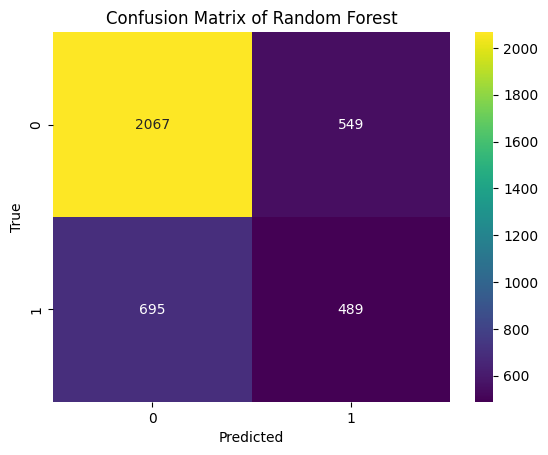

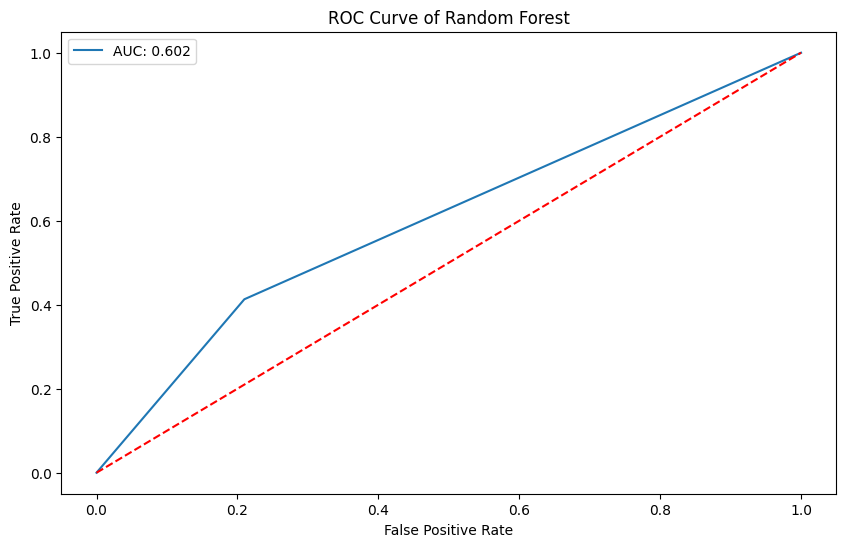

In [22]:
# roc auc curve painted of random forest
roc_auc_rf = roc_auc_score(y_test, y_pred)

# Confusion matrix of random forest
cm_rf = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_rf, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Random Forest')
plt.show()

# roc auc curve painted of random forest
roc_auc_rf

# plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_rf:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.legend()

In [29]:
def optimize_xgboost(trial):
    try:
        n_estimators = trial.suggest_int('n_estimators', 100, 300)
        max_depth = trial.suggest_int('max_depth', 1, 15)
        learning_rate = trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True)
        booster = trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart'])
        subsample = trial.suggest_float('subsample', 0.5, 0.9)
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 0.9)
        min_child_weight = trial.suggest_int('min_child_weight', 1, 6)
        xgb_model = xgb.XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate,
                                      booster=booster, subsample=subsample, colsample_bytree=colsample_bytree,
                                      random_state=42, min_child_weight=min_child_weight, n_jobs=-1)
        scorer = make_scorer(fbeta_score, beta=1.5)
        xgb_score = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring=scorer).mean()
        xgb_model.fit(X_train, y_train)
        y_pred = xgb_model.predict(X_test)
        logging.info(classification_report(y_test, y_pred))
        del xgb_model
        del scorer
        gc.collect()
        return xgb_score
    except Exception as e:
        logging.error(f"Optimization error: {e}")
        return float('-inf')

In [30]:
# Cargar el estudio desde la base de datos SQLite
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_xgb.db', load_if_exists=True, study_name='XGBoost f1.5', pruner=pruner)

# Continuar la optimización
study.optimize(optimize_xgboost, n_trials=100)

# Guardar el mejor modelo encontrado
best_xgb = study.best_params

# Serializar el estudio para guardarlo
joblib.dump(study, 'optuna_study_xgb.pkl')

# Imprimir los mejores parámetros
best_xgb

[I 2024-06-04 12:07:17,215] A new study created in RDB with name: XGBoost f1.5
d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [12:07:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [12:07:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [1

KeyboardInterrupt: 

In [34]:
study = optuna.load_study(study_name='XGBoost f1.5', storage='sqlite:///optuna_study_xgb.db')

best_xgb = study.best_params

best_xgb

{'n_estimators': 170,
 'max_depth': 10,
 'learning_rate': 0.002787726489617481,
 'booster': 'gbtree',
 'subsample': 0.8048994724992855,
 'colsample_bytree': 0.7770751416211152,
 'min_child_weight': 2}

In [35]:
study.best_value

0.7131875736155484

In [36]:
xgb_model = xgb.XGBClassifier(**best_xgb, random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [37]:
print(classification_report(y_test, y_pred))
type(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73      2616
         1.0       0.44      0.55      0.49      1184

    accuracy                           0.65      3800
   macro avg       0.61      0.62      0.61      3800
weighted avg       0.67      0.65      0.65      3800



str

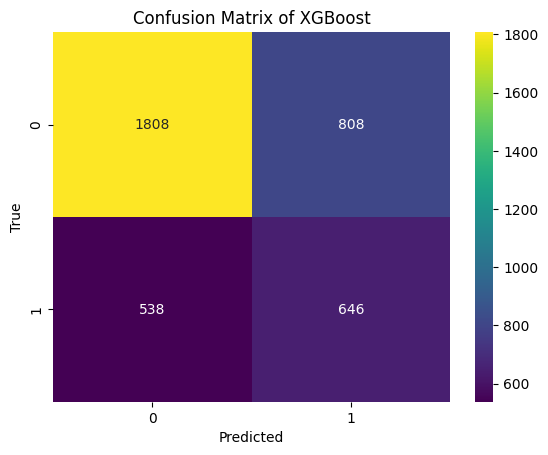

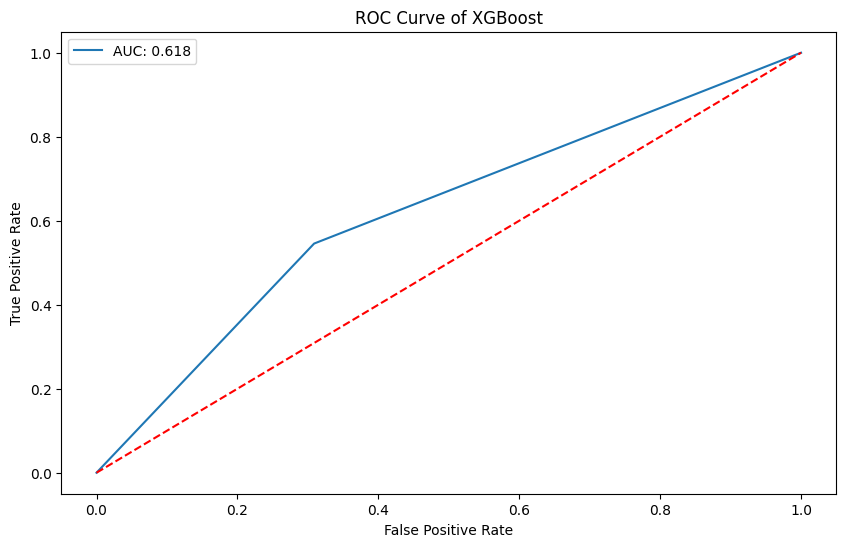

In [38]:
roc_auc_xgb = roc_auc_score(y_test, y_pred)

cm_xgb = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_xgb, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of XGBoost')
plt.show()

# plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_xgb:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of XGBoost')
plt.legend()
plt.show()

In [13]:
def optimize_nn(trial):
    try:
        neurons_first_layer = trial.suggest_int('neurons_first_layer', 10, 200)
        neurons_second_layer = trial.suggest_int('neurons_second_layer', 10, 200)
        neurons_third_layer = trial.suggest_int('neurons_third_layer', 10, 200)
        add_fourth_layer = trial.suggest_categorical('add_fourth_layer', [True, False])
        if add_fourth_layer:
            neurons_fourth_layer = trial.suggest_int('neurons_fourth_layer', 10, 200)
        else:
            neurons_fourth_layer = 0
        add_fifth_layer = trial.suggest_categorical('add_fifth_layer', [True, False])
        if add_fifth_layer:
            neurons_fifth_layer = trial.suggest_int('neurons_fifth_layer', 10, 200)
        else:
            neurons_fifth_layer = 0
        early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
        activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
        optimizer = trial.suggest_categorical('optimizer', ['adam', 'rmsprop', 'sgd'])
        loss = trial.suggest_categorical('loss', ['binary_crossentropy', 'hinge', 'squared_hinge', 'binary_focal_crossentropy'])
        batch_size = trial.suggest_int('batch_size', 32, 256)
        
        physical_devices = tf.config.list_physical_devices('GPU')
        if len(physical_devices) > 0:
            tf.config.experimental.set_memory_growth(physical_devices[0], True)
        
        nn = keras.models.Sequential()
        nn.add(keras.layers.InputLayer(shape=(X_train.shape[1],)))
        nn.add(keras.layers.Dense(neurons_first_layer, activation=activation))
        nn.add(keras.layers.Dense(neurons_second_layer, activation=activation))
        nn.add(keras.layers.Dense(neurons_third_layer, activation=activation))
        if add_fourth_layer:
            nn.add(keras.layers.Dense(neurons_fourth_layer, activation=activation))
        if add_fifth_layer:
            nn.add(keras.layers.Dense(neurons_fifth_layer, activation=activation))
        nn.add(keras.layers.Dense(1, activation='sigmoid'))
        nn.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
        nn.fit(X_train, y_train, validation_split=0.2, batch_size=batch_size, epochs=900, callbacks=[early_stopping], verbose=0)
        y_pred = (nn.predict(X_test) > 0.5).astype('int32').reshape(-1)
        logging.info(classification_report(y_test, y_pred))
        del nn
        gc.collect()
        return fbeta_score(y_test, y_pred, beta=1.1, pos_label=1, average='binary')
    except Exception as e:
        logging.error(f"Optimization error: {e}")
        return float('-inf')

In [14]:
optuna.logging.set_verbosity(optuna.logging.ERROR)

study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_nn.db', load_if_exists=True, study_name='Neural Network f1.1', pruner=pruner)

study.optimize(optimize_nn, n_trials=200)

best_nn = study.best_params

joblib.dump(study, 'optuna_study_nn.pkl')

best_nn

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step
119/119 ━━━

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step
119/119 ━━━

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step
119/119 ━━━

In [ ]:
study.best_value

0.5097902846137384

In [ ]:
study = optuna.load_study(study_name='Neural Network f1.1', storage='sqlite:///optuna_study_nn.db')

best_nn = study.best_params

best_nn

{'neurons_first_layer': 50,
 'neurons_second_layer': 68,
 'neurons_third_layer': 162,
 'add_fourth_layer': True,
 'neurons_fourth_layer': 84,
 'add_fifth_layer': True,
 'neurons_fifth_layer': 42,
 'patience': 38,
 'activation': 'relu',
 'optimizer': 'adam',
 'loss': 'hinge',
 'batch_size': 51}

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(best_nn['neurons_first_layer'], activation=best_nn['activation']))
model.add(keras.layers.Dense(best_nn['neurons_second_layer'], activation=best_nn['activation']))
model.add(keras.layers.Dense(best_nn['neurons_third_layer'], activation=best_nn['activation']))
if best_nn['add_fourth_layer']:
    model.add(keras.layers.Dense(best_nn['neurons_fourth_layer'], activation=best_nn['activation']))
if best_nn['add_fifth_layer']:
    model.add(keras.layers.Dense(best_nn['neurons_fifth_layer'], activation=best_nn['activation']))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=best_nn['optimizer'], loss=best_nn['loss'], metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=best_nn['patience'], restore_best_weights=True)

model.fit(X_train, y_train, validation_split=0.2, batch_size=best_nn['batch_size'], epochs=900, callbacks=[early_stopping], verbose=0)

y_pred = (model.predict(X_test) > 0.5).astype('int32').reshape(-1)

print(classification_report(y_test, y_pred))

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step
              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75      2616
         1.0       0.45      0.48      0.47      1184

    accuracy                           0.66      3800
   macro avg       0.61      0.61      0.61      3800
weighted avg       0.66      0.66      0.66      3800



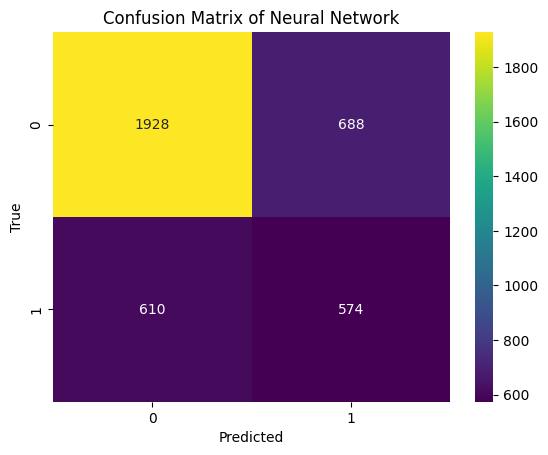

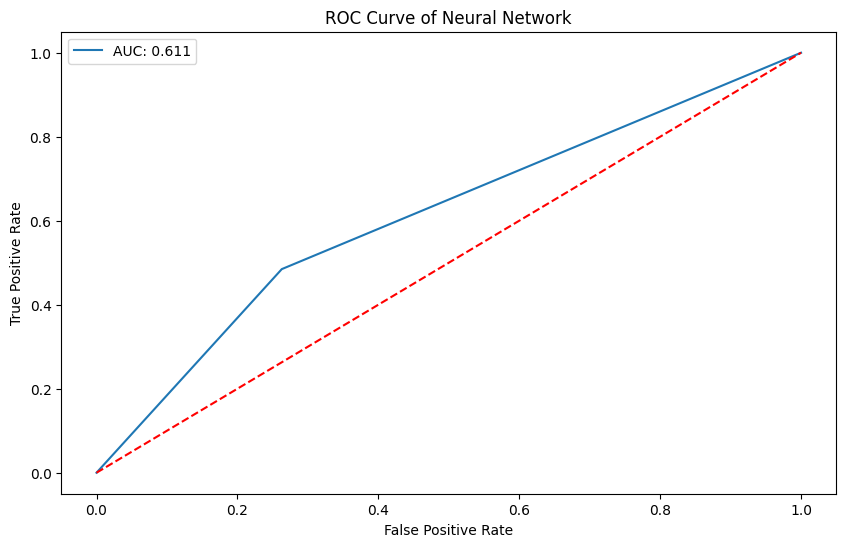

In [ ]:
roc_auc_nn = roc_auc_score(y_test, y_pred)

cm_nn = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_nn, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Neural Network')
plt.show()

roc_auc_nn

# plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_nn:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Neural Network')
plt.legend()
plt.show()